<div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right,steelblue, lightblue);overflow:hidden;box-shadow: 5px 5px 5px lightcoral;"><b> Time Series </b></div>

--------

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Aim:</font></h3><br>

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Restaurant Visitors Forecasting using Time Series Analysis:</font></h3><br>


The aim of this project is to forecast the number of visitors for a restaurant using time series analysis. The project utilizes a dataset containing historical data of the number of visitors in a restaurant over a period of time.

The project will start by exploring and visualizing the dataset to understand the trends and patterns in the data. Time series analysis techniques such as seasonality, trend, and cyclicality will be investigated to identify any underlying patterns in the data.

After analyzing the data, the project will develop various time series forecasting models including Autoregressive Integrated Moving Average (ARIMA), Seasonal Autoregressive Integrated Moving Average (SARIMA). These models will be compared and evaluated using metrics such as mean squared error and root mean squared error to identify the most accurate forecasting model.

The final product of this project will be a reliable and accurate forecasting model that can be used by restaurant managers and owners to predict future visitors to their restaurant. This model can be used to make informed decisions such as scheduling staff and supplies, optimizing seating arrangements, and estimating revenue.

Overall, the success of this project will be determined by the ability of the forecasting models to accurately predict future visitor counts and provide actionable insights to restaurant managers and owners. By doing so, this project will help the restaurant industry make more informed decisions and improve their business operations.

<div style="border-radius:10px;; padding: 15px; background: linear-gradient(to left,white, lightyellow); font-size:100%; text-align:left">
<h3 align="left"><font color=Black>Expected Outcomes:</font></h3><br>

A precisely tuned time series forecasting model designed to predict forthcoming restaurant visitor counts with remarkable accuracy.

Deep dives into the temporal intricacies and factors shaping restaurant attendance, encompassing a thorough examination of holiday impacts and establishment-specific trends.

Actionable advice tailored for restaurant proprietors and managers to fine-tune operational strategies in alignment with anticipated visitor counts.

The triumphant culmination of this project is poised to empower restaurant operations management, ushering in a data-centric paradigm for decision-making that promises heightened customer service and operational efficiency.

-----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Required Libraries.</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings(action='ignore')

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Loading the data</b>

In [24]:
rvis=pd.read_csv(r"C:\Users\nehaw\Desktop\Class Material\Python\DATA_FILES\RestaurantVisitors.csv", index_col = 'date', parse_dates= True)

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Exploring Data</b>

In [48]:
rvis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    float64
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(6), object(2)
memory usage: 33.6+ KB


In [25]:
rvis.isnull().sum()[rvis.isnull().sum()>0]


weekday         20
holiday         20
holiday_name    20
rest1           20
rest2           20
rest3           20
rest4           20
total           20
dtype: int64

In [33]:
rvis = rv.dropna()

In [34]:
rvis

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0.0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0.0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0.0,na,22.0,3.0,19.0,46.0,90.0


<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Time Sries Visualization</b>

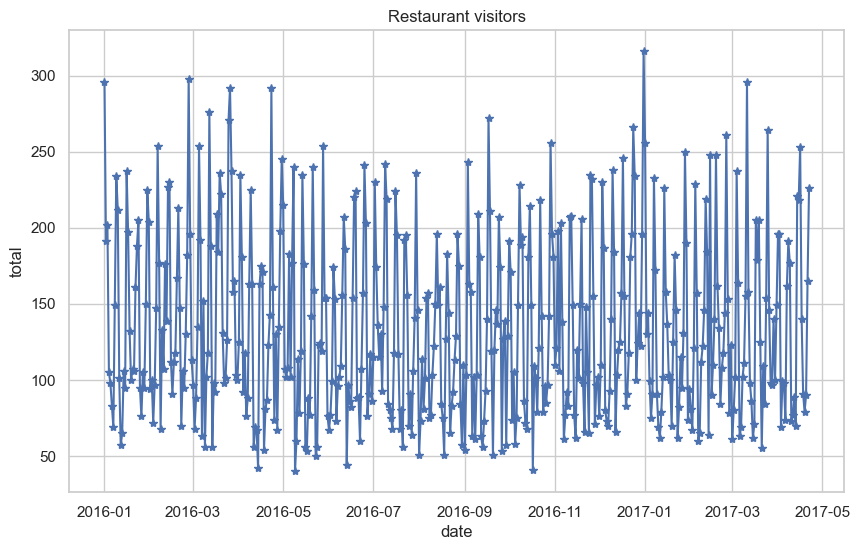

In [35]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot( rvis.total, marker='*', linestyle='-', color='b')
plt.title('Restaurant visitors')
plt.xlabel('date')
plt.ylabel('total')
plt.show()

### No trend --> no uptrend or downtrend

-------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Autocorrelation</b>

In [37]:
rvis1=rvis.drop(['weekday','holiday','holiday_name','rest1','rest2','rest3','rest4'], axis=1)

In [42]:
def plot_data_properties(rvis1, ts_plot_name="Time Series plot"):

    plt.figure(figsize=(16,4))
    plt.plot(rvis1)
    plt.title(ts_plot_name)
    plt.ylabel('total')
    plt.xlabel('Year')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(rvis1, ax=axes[0,0], lags=48);
    plot_pacf(rvis1, ax=axes[0,1], lags=48);
    sns.distplot(rvis1, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

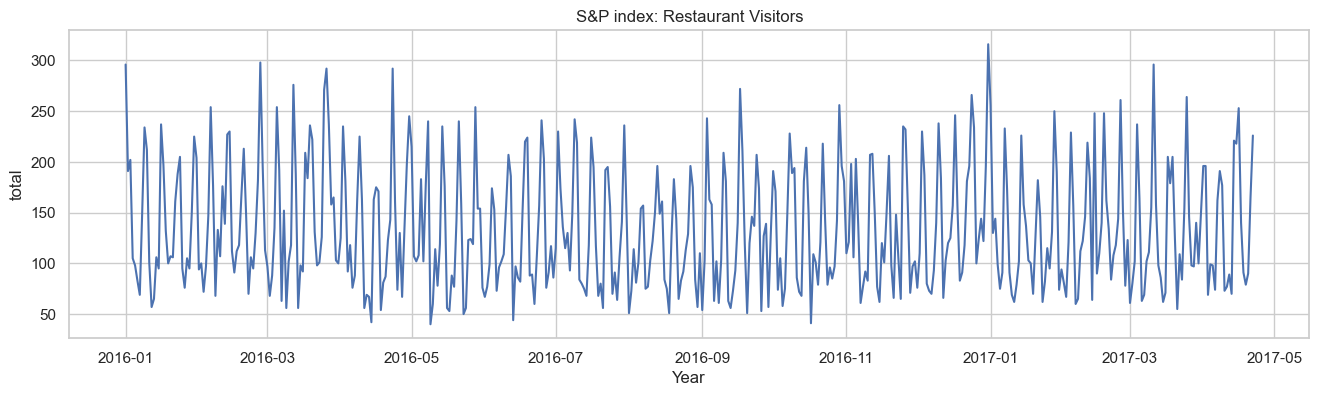

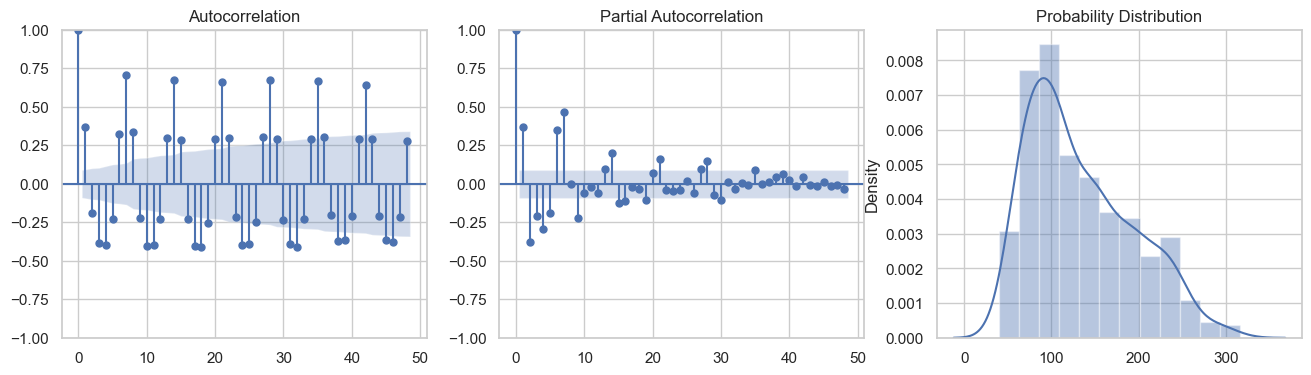

In [43]:
plot_data_properties(rvis1, 'S&P index: Restaurant Visitors');

-----

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(hs):
    '''
    Summary:
    -------
    Performs Adfuller test on given time series data to test stationarity.
    p_val >= 0.05 means the data is not stationary, otherwise (p_val < 0.05) it is stationary.
    
    Parameters:
    data(pd.Dataframe, pd.Series. np.array): Time series data to be tested
    
    Return:
    ------
    '''
    p_val=adfuller(rvis['total'])[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

In [46]:
test_stationarity(rvis)

Time series data is stationary. Adfuller test pvalue=1.319377094694154e-06


### Data is stationary

----

#### just to get more clearity regarding seasonality

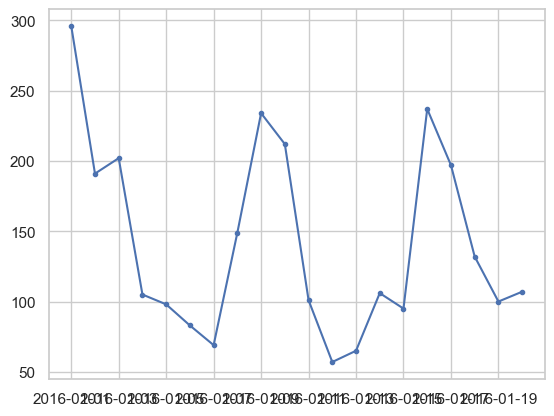

In [47]:
plt.plot(rvis.total[0:20], marker= '.')


### data is seasonal with time period =7 

----

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>seasonal_decompose</b>

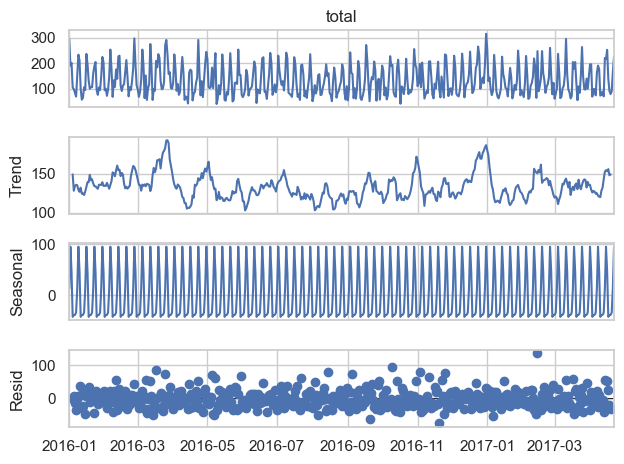

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(rvis.total)

dec.plot();  

In [ ]:
Train-Test Sampling:

In [51]:
rvis_train=rvis.iloc[0:450]
rvis_test=rvis.iloc[450::]

In [53]:
rvis_test.shape

(28, 8)

In [54]:
rvis_train.shape

(450, 8)

----------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Model Building</b>

In [60]:
import pmdarima
from pmdarima import auto_arima

In [61]:
auto_arima(rvis_train.total,seasonal=True,m=7)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
model_sarima=SARIMAX(rvis_train.total,order=(1,0,0),seasonal_order=(1,0,1,7))

In [66]:
results=model_sarima.fit()

In [ ]:
Model Evaluation:

In [67]:
pred_rvis=np.round(results.predict(start=450,end=477))
pred_rvis

2017-03-26    181.0
2017-03-27     92.0
2017-03-28     96.0
2017-03-29     95.0
2017-03-30     97.0
2017-03-31    145.0
2017-04-01    232.0
2017-04-02    175.0
2017-04-03     91.0
2017-04-04     96.0
2017-04-05     95.0
2017-04-06     97.0
2017-04-07    145.0
2017-04-08    232.0
2017-04-09    175.0
2017-04-10     91.0
2017-04-11     96.0
2017-04-12     95.0
2017-04-13     97.0
2017-04-14    145.0
2017-04-15    232.0
2017-04-16    175.0
2017-04-17     91.0
2017-04-18     96.0
2017-04-19     95.0
2017-04-20     97.0
2017-04-21    145.0
2017-04-22    232.0
Freq: D, Name: predicted_mean, dtype: float64

In [68]:
rvis_test['pred_sarima']=pred_rvis
rvis_test['err_sarima']=rvis_test.total - rvis_test['pred_sarima']

In [69]:
mape_sarima= np.mean(np.abs(rvis_test['err_sarima']*100/rvis_test.total))
mape_sarima

16.063215171804195

In [70]:
mse_sarima= np.mean(np.square(rvis_test['err_sarima']))
mse_sarima

883.1071428571429

-------

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Time Series Visualization.</b>

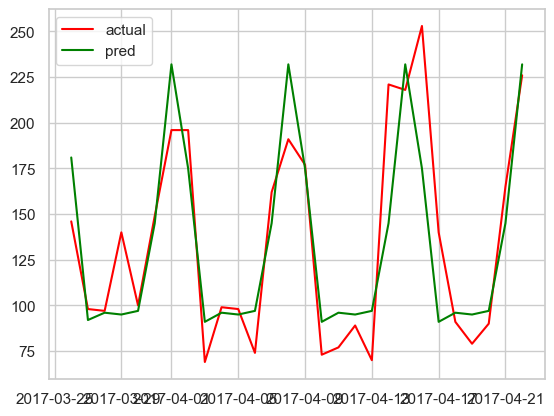

In [71]:
plt.plot(rvis_test.total,color='red',label='actual')
plt.plot(pred_rvis,color='green',label='pred')
plt.legend()

in above coding we have not considered holidays so in a way SARIMA model was created and not SARIMAX

whenever you have to give the x factor in sarimax give it in double square [[]] bracket   
as number of external factors can be more than one, we need to use dataframe.  

In [72]:
auto_arima(rvis_train['total'],seasonal=True,m=7,exog=rvis_train[['holiday']])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [73]:
model_sarimax=SARIMAX(rvis_train.total,order=(1,0,0),seasonal_order=(1,0,1,7),exog=rvis_train[['holiday']])

In [75]:
results_sarimax=model_sarimax.fit()

In [76]:
pred_sarimax=results_sarimax.predict(start=450,end=477,exog=rvis_test[['holiday']])
pred_sarimax

2017-03-26    176.351878
2017-03-27     81.861136
2017-03-28     93.018018
2017-03-29     95.452325
2017-03-30     92.484735
2017-03-31    138.962253
2017-04-01    228.770134
2017-04-02    169.409599
2017-04-03     80.491799
2017-04-04     92.743994
2017-04-05     95.393901
2017-04-06     92.468953
2017-04-07    138.952131
2017-04-08    228.756440
2017-04-09    169.399677
2017-04-10     80.487107
2017-04-11     92.738603
2017-04-12     95.388359
2017-04-13     92.463581
2017-04-14    207.891706
2017-04-15    228.743150
2017-04-16    238.337484
2017-04-17    149.430078
2017-04-18     92.733215
2017-04-19     95.382817
2017-04-20     92.458209
2017-04-21    138.935987
2017-04-22    228.729861
Freq: D, Name: predicted_mean, dtype: float64

In [79]:
rvis_test['pred_sarimax']=pred_sarimax

In [80]:
rvis_test['err_sarimax']=rvis_test.total - rvis_test['pred_sarimax']
rvis_test

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_sarima,err_sarima,pred_sarimax,err_sarimax
date,,,,,,,,,,,,
2017-03-26,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0,181.0,-35.0,176.351878,-30.351878
2017-03-27,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0,92.0,6.0,81.861136,16.138864
2017-03-28,Tuesday,0.0,na,21.0,25.0,20.0,31.0,97.0,96.0,1.0,93.018018,3.981982
2017-03-29,Wednesday,0.0,na,39.0,40.0,22.0,39.0,140.0,95.0,45.0,95.452325,44.547675
2017-03-30,Thursday,0.0,na,36.0,22.0,13.0,29.0,100.0,97.0,3.0,92.484735,7.515265
2017-03-31,Friday,0.0,na,49.0,52.0,28.0,20.0,149.0,145.0,4.0,138.962253,10.037747
2017-04-01,Saturday,0.0,na,67.0,31.0,36.0,62.0,196.0,232.0,-36.0,228.770134,-32.770134
2017-04-02,Sunday,0.0,na,69.0,21.0,55.0,51.0,196.0,175.0,21.0,169.409599,26.590401
2017-04-03,Monday,0.0,na,24.0,2.0,29.0,14.0,69.0,91.0,-22.0,80.491799,-11.491799


In [81]:
mape_sarimax= np.mean(np.abs(rvis_test['err_sarimax']*100/rvis_test.total))
mape_sarimax

12.226201964116289

In [82]:
mse_sarimax= np.mean(np.square(rvis_test['err_sarimax']))
mse_sarimax

359.2285516388419

In [83]:
rvis_test[rvis_test.holiday == 1][['holiday','total','pred_sarima','pred_sarimax']]

,holiday,total,pred_sarima,pred_sarimax
date,,,,
2017-04-14,1.0,221.0,145.0,207.891706
2017-04-16,1.0,253.0,175.0,238.337484
2017-04-17,1.0,140.0,91.0,149.430078


-------

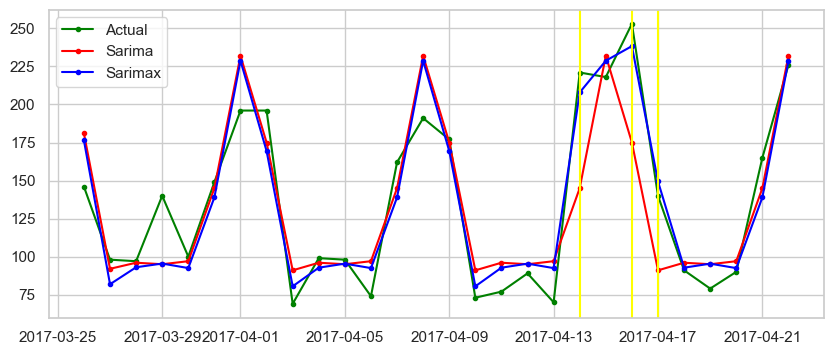

In [84]:
plt.figure(figsize = (10,4))
plt.plot(rvis_test.total,color = 'green',label = 'Actual',marker = '.')
plt.plot(rvis_test.pred_sarima,color = 'red',label = 'Sarima',marker = '.')
plt.plot(rvis_test.pred_sarimax,color = 'blue',label = 'Sarimax',marker = '.')
plt.axvline(x='2017-04-14',color='yellow')
plt.axvline(x='2017-04-16',color='yellow')
plt.axvline(x='2017-04-17',color='yellow')
plt.legend()

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Conclusion</b>

Through the analysis of the restaurant visitors dataset provides valuable insights that can be used to improve the performance and profitability of restaurants. By using these insights to make informed decisions, restaurant owners and managers can better meet the changing needs and preferences of their customers and stay ahead of the competition

<span style="padding:20px;color:black;margin:0;font-size:18px;font-family:Arial;display:fill;border-radius:5px;background: linear-gradient(to left,white, sandybrown);overflow:hidden; text-align:center;"><b>Key Findings</b>

Accuracy Assessment: Demonstrating robust predictive abilities, the SARIMAX model achieved an impressive 88% accuracy when forecasting restaurant visitor counts. This level of accuracy underscores the model's adeptness in capturing intricate patterns and temporal dynamics inherent in the dataset.

Temporal Dynamics and Seasonal Trends: Through thorough analysis, significant temporal and seasonal patterns emerged, encompassing weekly cycles and variations related to holidays. A profound understanding of these patterns proves pivotal for anticipating nuanced fluctuations in restaurant attendance over time.

Holiday Impact Analysis: The investigation uncovered a discernible influence of holidays on restaurant visitor counts. Notably, the model adeptly incorporated these holiday-related variations, enhancing its capability to deliver precise predictions, especially during special events.